# EDA del archivo resumido Historico velocidad internet

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
#importo 
ruta_al_archivo = '../DATA/08-historico_velocidad_internet.csv'
df1 = pd.read_csv(ruta_al_archivo, encoding='utf-8')

In [3]:
#observo resultado
df1.head(36)

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,4,10.656,Oct-Dic 2022
1,2022,3,6.246,Jul-Sept 2022
2,2022,2,5.844,Abr-Jun 2022
3,2022,1,5.511,Ene-Mar 2022
4,2021,4,5.234,Oct-Dic 2021
5,2021,3,4.846,Jul-Sept 2021
6,2021,2,4.563,Abr-Jun 2021
7,2021,1,4.311,Ene-Mar 2021
8,2020,4,4.236,Oct-Dic 2020
9,2020,3,4.067,Jul-Sept 2020


In [4]:
#Se ve la composicion
df1.info()#no hay  nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     36 non-null     int64  
 1   Trimestre               36 non-null     int64  
 2   Mbps (Media de bajada)  36 non-null     float64
 3   Trimestre.1             36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


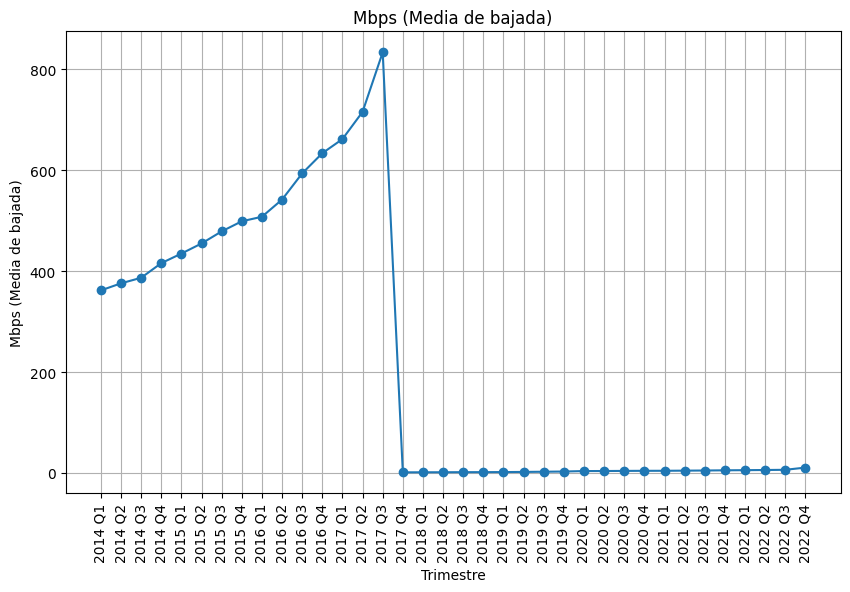

In [5]:
# Crear una nueva columna 'Fecha' combinando 'Año' y 'Trimestre'
df1['Fecha'] = df1['Año'].astype(str) + ' Q' + df1['Trimestre'].astype(str)
# Ordenar el DataFrame por la columna 'Fecha' de menor a mayor
df1 = df1.sort_values(by='Fecha')
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(df1['Fecha'], df1['Mbps (Media de bajada)'], marker='o')
plt.title('Mbps (Media de bajada)')
plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

No es real el hecho de que haya menos velocidad, sino que la medida es en kbps. Dividimos por 1000 para poder comparar las mediciones

In [6]:
df1 = df1[['Mbps (Media de bajada)', 'Fecha']]

In [7]:
# Dividir por 1000 la columna 'Mbps (Media de bajada)' cuando 'Fecha' es menor a '2017 Q4'
df1.loc[df1['Fecha'] < '2017 Q4', 'Mbps (Media de bajada)'] /= 1000

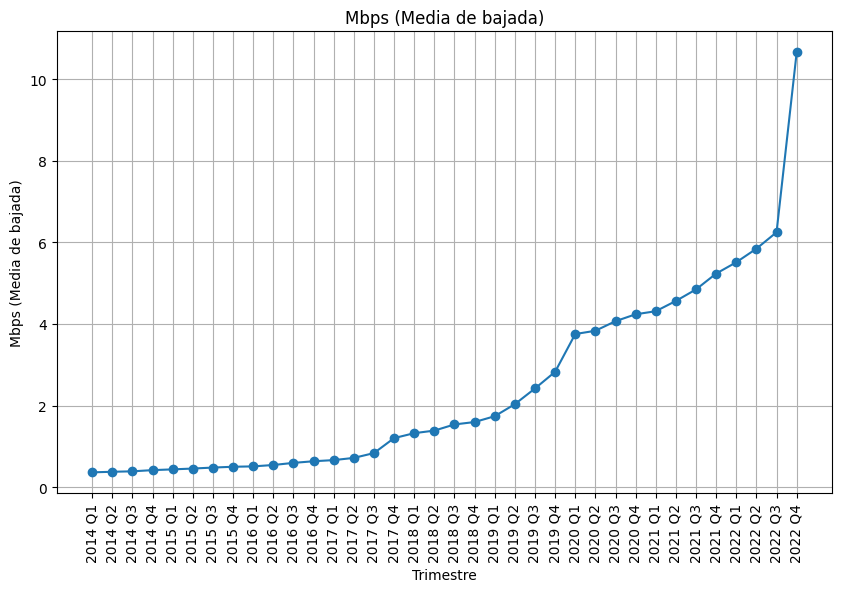

In [8]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(df1['Fecha'], df1['Mbps (Media de bajada)'], marker='o')
plt.title('Mbps (Media de bajada)')
plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

# EDA del archivo Historico velocidad internet con provincia

In [9]:
#importo 
ruta_al_archivo = '../DATA/09-historico_velocidad_internet.csv'
df = pd.read_csv(ruta_al_archivo, encoding='utf-8')

In [10]:
#observo resultado
df.head(100)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000
1,2022,4,Capital Federal,18.286
2,2022,4,Catamarca,8.333
3,2022,4,Chaco,10.402
4,2022,4,Chubut,1.592
...,...,...,...,...
95,2022,1,Tucumán,4.724
96,2021,4,Buenos Aires,6.021
97,2021,4,Capital Federal,8.295
98,2021,4,Catamarca,4.638


In [11]:
#Se ve la composicion
df.info()#no hay  nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [12]:
df = df.sort_values(by='Mbps (Media de bajada)')

In [13]:
df.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
285,2020,1,Santiago Del Estero,1.000
423,2018,3,Río Negro,1.006
488,2017,4,Formosa,1.011
228,2020,3,Mendoza,1.019
439,2018,2,Entre Ríos,1.019


In [14]:
df.tail(10)#Se observan datos extrañamente altos..

,Año,Trimestre,Provincia,Mbps (Media de bajada)
416,2018,3,Formosa,932.0
479,2018,1,Tucumán,936.0
333,2019,3,Santiago Del Estero,939.0
447,2018,2,Río Negro,951.0
142,2021,3,Tierra Del Fuego,952.0
309,2019,4,Santiago Del Estero,979.0
392,2018,4,Formosa,982.0
368,2019,1,Formosa,983.0
202,2020,4,La Pampa,988.0
463,2018,1,Entre Ríos,988.0


In [15]:
df = df.sort_index(ascending=False)


Vemos que pasa con alguna provincia para entender estos aparentes outliers...

In [16]:
# Filtrar el DataFrame para obtener solo las filas donde la provincia es "Formosa"
df_formosa = df.loc[df['Provincia'] == 'Formosa']

# Mostrar el DataFrame resultante
df_formosa.head(30)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
848,2014,1,Formosa,257.000
824,2014,2,Formosa,265.000
800,2014,3,Formosa,266.000
776,2014,4,Formosa,302.000
752,2015,1,Formosa,338.000
728,2015,2,Formosa,376.000
704,2015,3,Formosa,417.000
680,2015,4,Formosa,466.000
656,2016,1,Formosa,487.000
632,2016,2,Formosa,510.000


Se observa lo msimo que en ocasiones anteriores, son kbps hasta que llegan a 1, luego son mbps nuevamente

In [17]:
# Filtrar datos solo para el año 2022
datos_2022 = df[df['Año'] == 2022]
datos_2022.head(15)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
95,2022,1,Tucumán,4.724
94,2022,1,Tierra Del Fuego,1.073
93,2022,1,Santiago Del Estero,1.450
92,2022,1,Santa Fe,3.889
91,2022,1,Santa Cruz,1.089
90,2022,1,San Luis,2.095
89,2022,1,San Juan,1.199
88,2022,1,Salta,3.671
87,2022,1,Río Negro,3.109
86,2022,1,Neuquén,4.305


siendo capital federal el lugar con una de las mejores conectividades teoricamente y con 18mbps, cuesta pensar que este bien que la pampa tenga 191, por lo q se procede a hacer algunas divisiones. 

In [18]:
# Convertir la columna 'Mbps (Media de bajada)' a números y manejar los valores no válidos
df['Mbps (Media de bajada)'] = pd.to_numeric(df['Mbps (Media de bajada)'].astype(str).replace(',', '.'), errors='coerce')
# Crear una nueva columna 'Fecha' combinando 'Año' y 'Trimestre'
df['Fecha'] = df['Año'].astype(str) + ' Q' + df['Trimestre'].astype(str)
# Dividir por 1000 la columna 'Mbps (Media de bajada)' cuando 'Mbps (Media de bajada)' es menor a '125'
df.loc[df['Mbps (Media de bajada)'] > 20, 'Mbps (Media de bajada)'] /= 1000
# Ordenar el DataFrame por la columna 'Fecha' de menor a mayor
df = df.sort_values(by='Fecha')

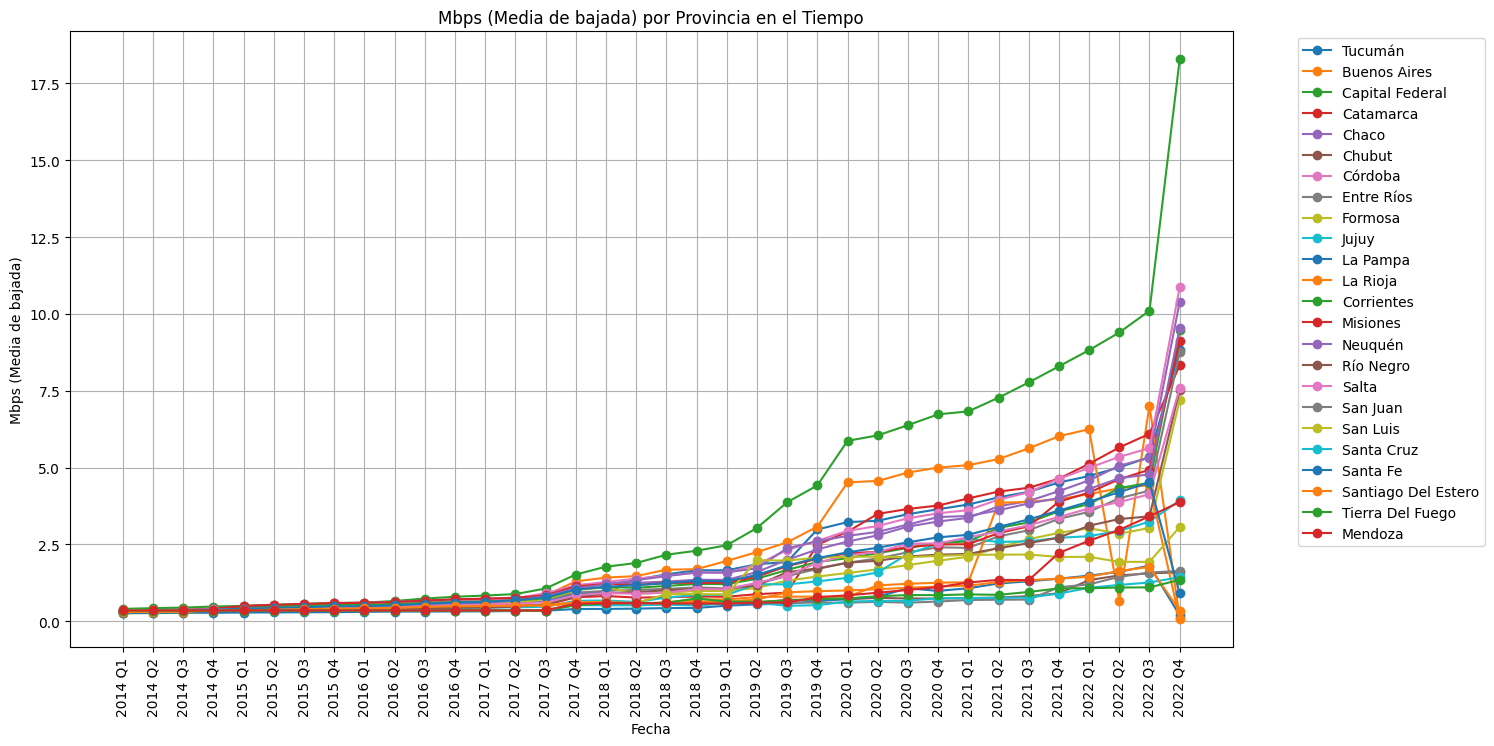

In [19]:
# Graficar Mbps (Media de bajada) por provincia en el tiempo
plt.figure(figsize=(15, 8))
for provincia in df['Provincia'].unique():
    df_provincia = df[df['Provincia'] == provincia]
    plt.plot(df_provincia['Fecha'], df_provincia['Mbps (Media de bajada)'], label=provincia, marker='o')

plt.title('Mbps (Media de bajada) por Provincia en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

La division hecha anteriormente no fue del todo correcta ya que se ve picos descendentes hacia 0.. evaluamos dichos numeros. Para esto vemos las filas a partir del 2021 donde estan los picos y se multiplica por 10.


In [20]:
# Filtrar las filas que cumplen con las condiciones
condiciones = (df['Año'] > 2021) & (df['Mbps (Media de bajada)'] < 1)
filas_a_multiplicar = df.loc[condiciones]

# Multiplicar por 10 la columna 'Mbps (Media de bajada)' para las filas seleccionadas
df.loc[condiciones, 'Mbps (Media de bajada)'] *= 10

In [21]:
# Filtrar las filas que cumplen con las condiciones
condiciones = (df['Año'] > 2021) & (df['Mbps (Media de bajada)'] < 1)
filas_a_multiplicar = df.loc[condiciones]

# Multiplicar por 10 la columna 'Mbps (Media de bajada)' para las filas seleccionadas
df.loc[condiciones, 'Mbps (Media de bajada)'] *= 10

Debido a que quedaba un unico picco hacia abajo se observa que bueos aires tiene un error quedando la ultima medida en 1.1. Se la multiplica por 10

In [22]:
condiciones_buenos_aires_2022 = (df['Provincia'] == 'Buenos Aires') & (df['Año'] == 2022)
datos_buenos_aires_2022 = df.loc[condiciones_buenos_aires_2022]

# Mostrar el resultado
datos_buenos_aires_2022.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Fecha
72,2022,1,Buenos Aires,6.251,2022 Q1
48,2022,2,Buenos Aires,6.550,2022 Q2
24,2022,3,Buenos Aires,7.019,2022 Q3
0,2022,4,Buenos Aires,1.110,2022 Q4


In [23]:
# Filtrar las filas que cumplen con las condiciones
condiciones = (df['Año'] > 2021) & (df['Provincia'] == 'Buenos Aires')&(df['Mbps (Media de bajada)'] < 2)
filas_a_multiplicar = df.loc[condiciones]

# Multiplicar por 10 la columna 'Mbps (Media de bajada)' para las filas seleccionadas
df.loc[condiciones, 'Mbps (Media de bajada)'] *= 10

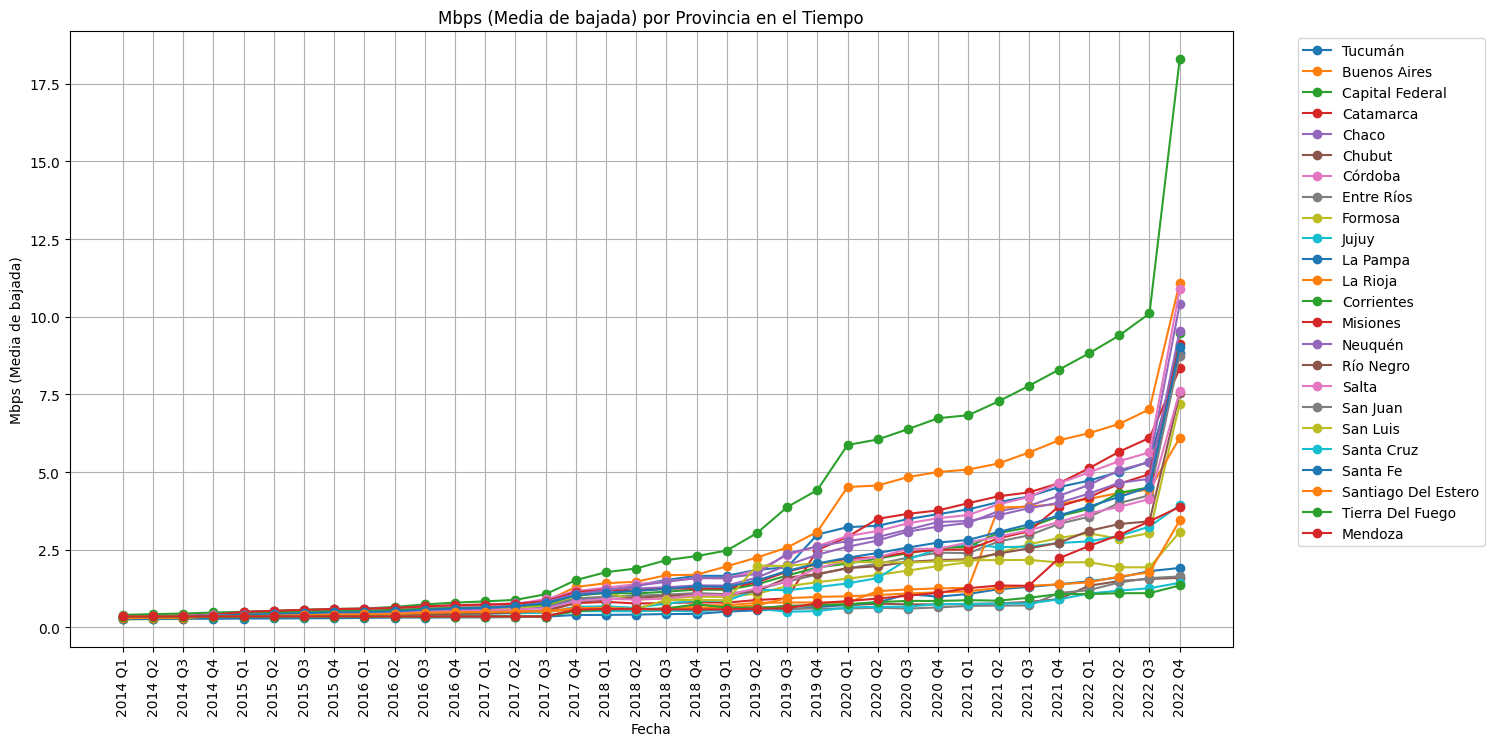

In [24]:
# Graficar Mbps (Media de bajada) por provincia en el tiempo
plt.figure(figsize=(15, 8))
for provincia in df['Provincia'].unique():
    df_provincia = df[df['Provincia'] == provincia]
    plt.plot(df_provincia['Fecha'], df_provincia['Mbps (Media de bajada)'], label=provincia, marker='o')

plt.title('Mbps (Media de bajada) por Provincia en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

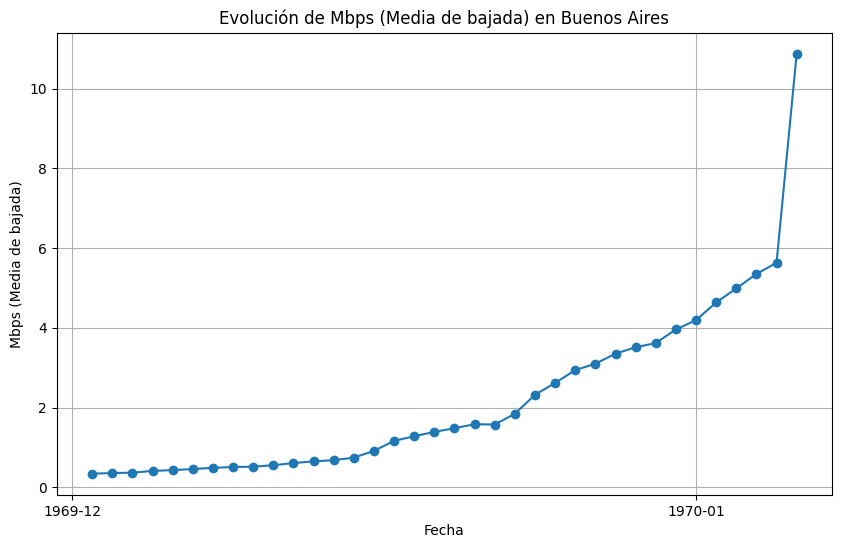

In [25]:
import matplotlib.dates as mdates

# Filtrar el DataFrame para obtener solo las filas con la provincia de Buenos Aires
df_buenos_aires = df[df['Provincia'] == 'Córdoba']

# Ordenar el DataFrame por la columna 'Fecha'
df_buenos_aires = df_buenos_aires.sort_values(by='Fecha')

# Crear el gráfico de línea
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_buenos_aires['Fecha'], df_buenos_aires['Mbps (Media de bajada)'], marker='o', linestyle='-')

# Configurar el formato de las fechas en el eje x
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Evolución de Mbps (Media de bajada) en Buenos Aires')
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.grid(True)
plt.show()

Asi queda el grafico final, mucho mas coherente que al inicio y coincidiendo con los resultados del cuadro resumen anterior que daba un promedio de bajada de 11 mbps

## Exporto csv para usar en power bi

In [27]:
import os
ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Proyecto-individual-2-Data-Analisis\DATA PowerBi'
nombre_archivo = 'velocidad historica.csv'
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

df.to_csv(ruta_completa, index=False)